In [1]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

C:\Users\rodelga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_root_dir = r'D:\CIC\Train and Test\Filtered Corr Attr'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

entropy_results = confusion_matrix(y_test, y_pred_entropy)
entropy_accuracy_score = accuracy_score(y_test, y_pred_entropy)
entropy_error = zero_one_loss(y_test, y_pred_entropy)
entropy_report = classification_report(y_test, y_pred_entropy)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [4]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Entropy Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{entropy_results[0]}")
print(f"{entropy_results[1]} \n")

print("Report :")
print(entropy_report) 

print(f"True Postive   : {entropy_results[0][0]}")
print(f"False Positive : {entropy_results[0][1]}")
print(f"False Negative : {entropy_results[1][0]}")
print(f"True Negative  : {entropy_results[1][1]}")
print(f"Error Value    : {entropy_error}")
print(f"Accuracy_Score : {entropy_accuracy_score}")
print("=================================================")


Total time: 317.1851 seconds 

Entropy Results
Confusion Matrix:
[3831681  184989]
[140925 683578] 

Report :
              precision    recall  f1-score   support

           0       0.96      0.95      0.96   4016670
           1       0.79      0.83      0.81    824503

    accuracy                           0.93   4841173
   macro avg       0.88      0.89      0.88   4841173
weighted avg       0.93      0.93      0.93   4841173

True Postive   : 3831681
False Positive : 184989
False Negative : 140925
True Negative  : 683578
Error Value    : 0.06732128763008471
Accuracy_Score : 0.9326787123699153


In [5]:
feature_importances = pd.Series(dt_entropy.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


TotLen Fwd Pkts      0.356747
Dst Port             0.348920
Init Fwd Win Byts    0.114232
Flow Duration        0.104425
Bwd Pkt Len Mean     0.044154
Flow IAT Min         0.031521
Protocol             0.000000
Tot Fwd Pkts         0.000000
Tot Bwd Pkts         0.000000
TotLen Bwd Pkts      0.000000
Fwd Pkt Len Max      0.000000
Fwd Pkt Len Min      0.000000
Fwd Pkt Len Mean     0.000000
Fwd Pkt Len Std      0.000000
Bwd Pkt Len Max      0.000000
Bwd Pkt Len Min      0.000000
Flow Byts/s          0.000000
Flow Pkts/s          0.000000
Flow IAT Mean        0.000000
Flow IAT Std         0.000000
Flow IAT Max         0.000000
Fwd IAT Tot          0.000000
Fwd IAT Mean         0.000000
Fwd IAT Std          0.000000
Fwd IAT Max          0.000000
Fwd IAT Min          0.000000
Bwd IAT Tot          0.000000
Bwd IAT Mean         0.000000
Bwd IAT Std          0.000000
Bwd IAT Max          0.000000
Bwd IAT Min          0.000000
Fwd PSH Flags        0.000000
Fwd URG Flags        0.000000
Fwd Header

Top 20 features:
---------------------------------
TotLen Fwd Pkts      0.356747
Dst Port             0.348920
Init Fwd Win Byts    0.114232
Flow Duration        0.104425
Bwd Pkt Len Mean     0.044154
Flow IAT Min         0.031521
Protocol             0.000000
Tot Fwd Pkts         0.000000
Tot Bwd Pkts         0.000000
TotLen Bwd Pkts      0.000000
Fwd Pkt Len Max      0.000000
Fwd Pkt Len Min      0.000000
Fwd Pkt Len Mean     0.000000
Fwd Pkt Len Std      0.000000
Bwd Pkt Len Max      0.000000
Bwd Pkt Len Min      0.000000
Flow Byts/s          0.000000
Flow Pkts/s          0.000000
Flow IAT Mean        0.000000
Flow IAT Std         0.000000
dtype: float64


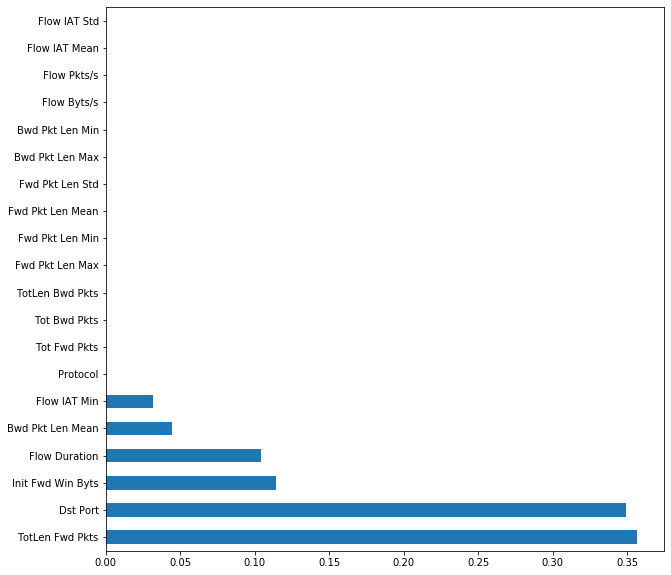

In [6]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
Protocol            0.0
Tot Fwd Pkts        0.0
Tot Bwd Pkts        0.0
TotLen Bwd Pkts     0.0
Fwd Pkt Len Max     0.0
Fwd Pkt Len Min     0.0
Fwd Pkt Len Mean    0.0
Fwd Pkt Len Std     0.0
Bwd Pkt Len Max     0.0
Bwd Pkt Len Min     0.0
Flow Byts/s         0.0
Flow Pkts/s         0.0
Flow IAT Mean       0.0
Flow IAT Std        0.0
Flow IAT Max        0.0
Fwd IAT Tot         0.0
Fwd IAT Mean        0.0
Fwd IAT Std         0.0
Fwd IAT Max         0.0
Fwd IAT Min         0.0
dtype: float64


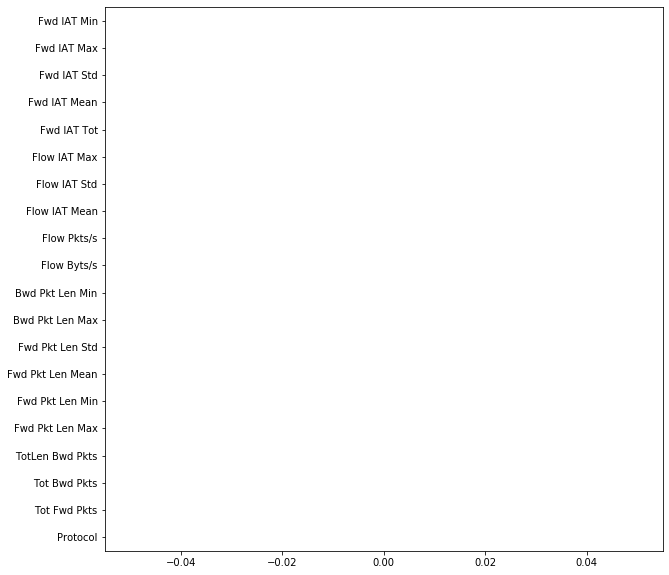

In [7]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))

In [8]:
model_file_path = r'D:\CIC\Train and Test\Filtered Corr Attr\entropy_model.sav'
pickle.dump(dt_entropy, open(model_file_path, 'wb'))